In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [22]:
# Load your CSV file
df = pd.read_csv('sample_data.csv')

In [23]:
df.head() 

,Values,Timestamp
0,100,26-06-2024 06:17
1,100,26-06-2024 06:18
2,100,26-06-2024 06:18
3,100,26-06-2024 06:18
4,100,26-06-2024 06:19


In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\dell\AppData\Local\Temp\ipykernel_19308\766710655.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [25]:
df = df.sort_values('Timestamp')

In [26]:
df['MA_5'] = df['Values'].rolling(window=5, min_periods=1).mean()
df['MA_1000'] = df['Values'].rolling(window=1000, min_periods=1).mean()
df['MA_5000'] = df['Values'].rolling(window=5000, min_periods=1).mean()

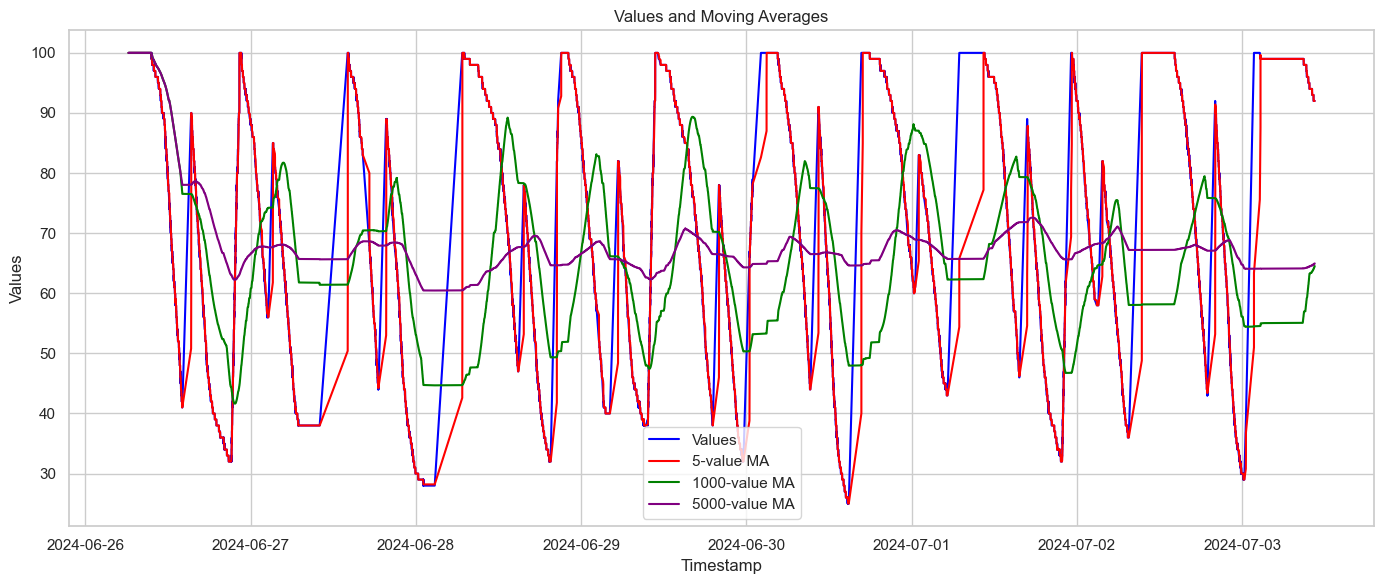

In [27]:
plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'], df['Values'], label='Values', color='blue')
plt.plot(df['Timestamp'], df['MA_5'], label='5-value MA', color='red')
plt.plot(df['Timestamp'], df['MA_1000'], label='1000-value MA', color='green')
plt.plot(df['Timestamp'], df['MA_5000'], label='5000-value MA', color='purple')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Values and Moving Averages')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
peaks, _ = find_peaks(df['Values'])
lows, _ = find_peaks(-df['Values'])

peak_df = df.iloc[peaks][['Timestamp', 'Values']]
low_df = df.iloc[lows][['Timestamp', 'Values']]

print("Local Peaks:")
print(peak_df.to_string(index=False))
print("\nLocal Lows:")
print(low_df.to_string(index=False))

Local Peaks:
          Timestamp  Values
2024-06-26 09:36:00     100
2024-06-26 09:42:00      99
2024-06-26 09:58:00      98
2024-06-26 10:33:00      96
2024-06-26 10:41:00      95
2024-06-26 10:58:00      93
2024-06-26 11:08:00      91
2024-06-26 11:23:00      90
2024-06-26 11:39:00      86
2024-06-26 11:41:00      85
2024-06-26 11:47:00      84
2024-06-26 11:49:00      83
2024-06-26 11:56:00      81
2024-06-26 11:59:00      80
2024-06-26 12:01:00      79
2024-06-26 12:13:00      75
2024-06-26 12:23:00      72
2024-06-26 12:25:00      71
2024-06-26 12:34:00      68
2024-06-26 12:37:00      67
2024-06-26 12:41:00      66
2024-06-26 12:51:00      63
2024-06-26 12:55:00      62
2024-06-26 13:07:00      59
2024-06-26 13:24:00      54
2024-06-26 13:37:00      51
2024-06-26 13:40:00      50
2024-06-26 13:48:00      47
2024-06-26 13:51:00      46
2024-06-26 13:57:00      44
2024-06-26 15:23:00      90
2024-06-26 15:53:00      81
2024-06-26 15:59:00      79
2024-06-26 16:08:00      76
2024-06

In [29]:
below_20 = df[df['Values'] < 20][['Timestamp', 'Values']]
print("\nInstances where Values < 20:")
print(below_20.to_string(index=False))



Instances where Values < 20:
Empty DataFrame
Columns: [Timestamp, Values]
Index: []


In [30]:
df['diff'] = df['Values'].diff()
df['slope_accel'] = df['diff'].diff()
accelerating_down = df[(df['diff'] < 0) & (df['slope_accel'] < 0)][['Timestamp', 'Values', 'diff', 'slope_accel']]

print("\nAccelerating Downward Slopes:")
print(accelerating_down.to_string(index=False))



Accelerating Downward Slopes:
          Timestamp  Values  diff  slope_accel
2024-06-26 09:36:00      99  -1.0         -1.0
2024-06-26 09:37:00      99  -1.0         -2.0
2024-06-26 09:42:00      98  -1.0         -1.0
2024-06-26 09:43:00      98  -1.0         -1.0
2024-06-26 09:57:00      97  -1.0         -1.0
2024-06-26 09:58:00      97  -1.0         -1.0
2024-06-26 10:11:00      96  -1.0         -1.0
2024-06-26 10:33:00      95  -1.0         -1.0
2024-06-26 10:34:00      95  -1.0         -1.0
2024-06-26 10:41:00      94  -1.0         -1.0
2024-06-26 10:42:00      94  -1.0         -1.0
2024-06-26 10:54:00      93  -1.0         -1.0
2024-06-26 10:58:00      92  -1.0         -1.0
2024-06-26 10:59:00      92  -1.0         -1.0
2024-06-26 11:04:00      91  -1.0         -1.0
2024-06-26 11:08:00      90  -1.0         -1.0
2024-06-26 11:08:00      90  -1.0         -1.0
2024-06-26 11:23:00      89  -1.0         -1.0
2024-06-26 11:24:00      89  -1.0         -1.0
2024-06-26 11:30:00      88  